# Classification using decision trees

# Dataset description

In this assignment, we will look at decision trees for the classification problem, and talk about how to deal with unbalanced datasets.

The provided dataset contains information about accepted offers on loans in **Thera-Bank**. The main customers of the bank use the bank to deposit their money in it, i.e. they are depositors. At the same time, the big profit to the bank are the creditors - people who take a loan from the bank. Therefore, the bank wants to form favorable loan offers for its depositors. The bank's campaign for depositors last year showed that the conversion rate was more than 9,6%.

This prompted the marketing department to develop campaigns with improved target marketing to increase the probability of success with, of course, a minimal budget. The department would like to develop a classifier to help them identify potential customers who are more likely to purchase a loan. This would increase the probability of success while reducing the cost of the campaign.

The dataset contains both customer information and information about their response to the previous year's campaign:

*   **ID**: client ID

*   **Age**: Age

*   **Experience**: Work experience

*   **Income**: Annual income (in thousands)

*   **ZIP Code**: Residence index

*   **Family**: Family size

*   **CCAvg**: Average credit card spending per month (in thousands)

*   **Education**: Level of education (1: Bachelor's degree, 2: Master's degree, 3: something more)

*   **Mortgage**: Value of mortgage, if any (in thousands)

*   **Securities Account**: Existence of a securities account

*   **CD Account**: Existence of a certificate of deposit

*   **Online**: Whether the client uses internet banking

*   **CreditCard**: Whether the client uses a credit card issued by this bank

*   **Personal Loan**: Whether the client has accepted a personalized loan offer (target feature)

# Exploratory data analysis

Read the dataset into a dataframe

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [17]:
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')

Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [3]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


The dataset contains 14 features, 1 of which is the target feature.

1 nominal feature: **ID**

5 numeric features: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 categorical features: **Family**, **Education**, **ZIP Code**

5 boolean features: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

There are no missing values.

Experience contains some negative values.

Remove the ID column, we won't need it.

In [18]:
df = df.drop(columns="ID")

In [50]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,2.4,3,0,0,0,0,0,0
3996,36,13,91,1,18.0,3,289,0,0,0,1,0
3997,57,34,131,2,32.4,1,0,0,0,0,0,0
3998,40,18,83,1,12.0,3,0,0,0,0,0,0


It makes sense to try to catch any correlations or lack thereof.

Build a correlation matrix.

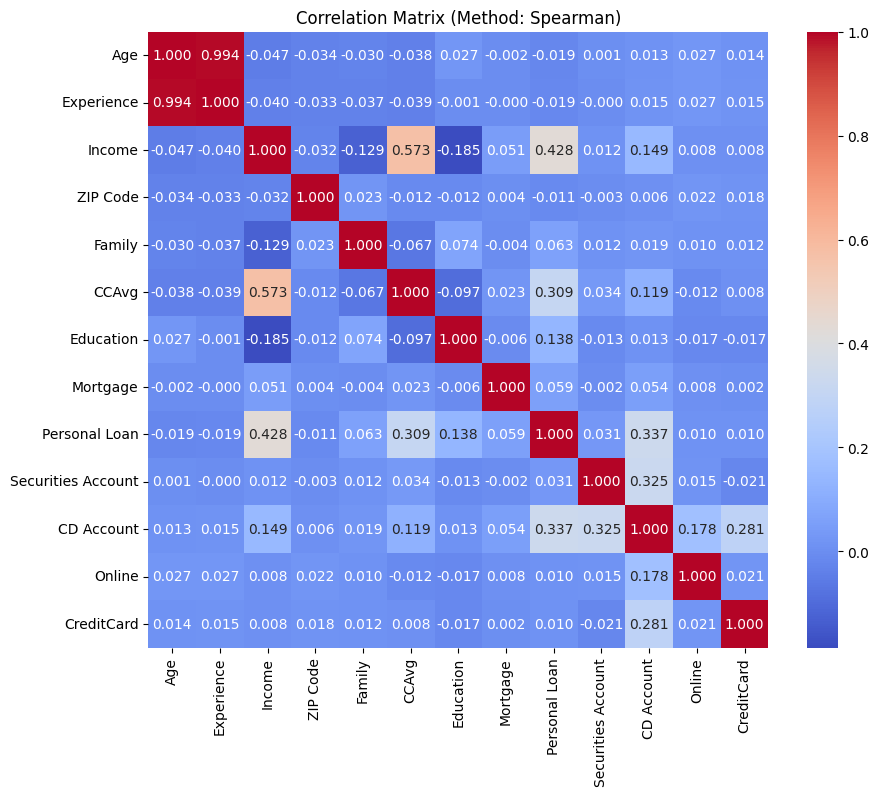

In [12]:
corr_matrix = df.corr('spearman')
figsize = (10,8)
plt.figure(figsize=figsize)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title(f"Correlation Matrix (Method: {"spearman".capitalize()})")
plt.show()

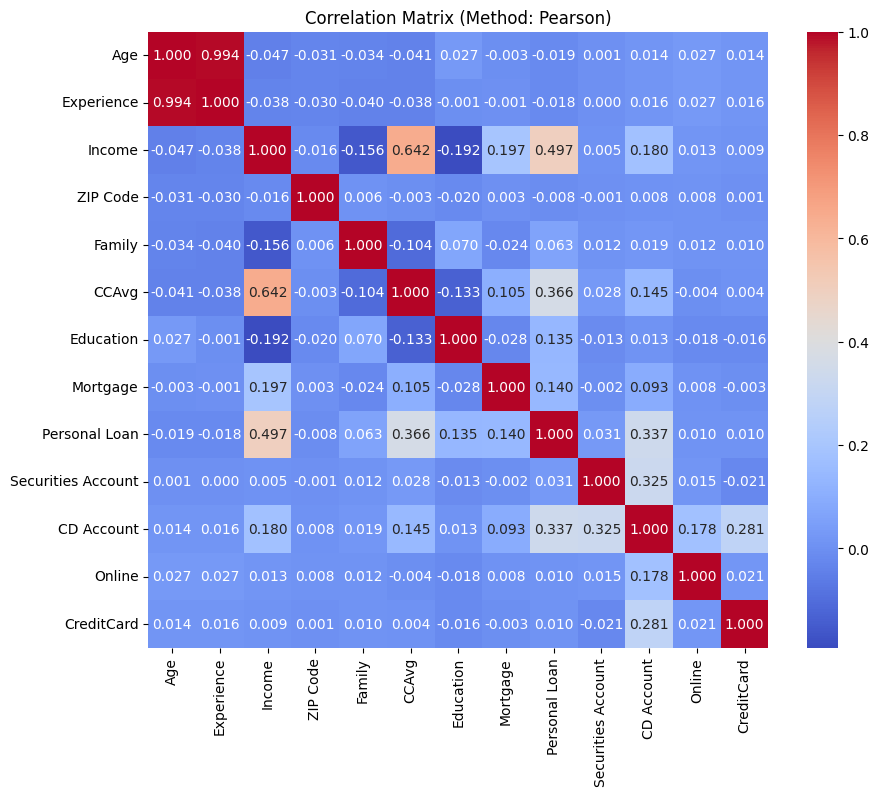

In [10]:
corr_matrix = df.corr('pearson')
plt.figure(figsize=figsize)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title(f"Correlation Matrix (Method: {"pearson".capitalize()})")
plt.show()

Identify the two most correlated features.

In [ ]:
#Age, Experience

Identify the feature that is least correlated (almost uncorrelated) with the other features (including target). Remove this feature from consideration.

Enter the name of the removed feature.

In [27]:
feature_correlations = corr_matrix.abs().mean(axis=0)
least_correlated_feature = feature_correlations.idxmin()
print(least_correlated_feature)
df = df.drop(columns="ZIP Code")

ZIP Code


In [51]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,2.4,3,0,0,0,0,0,0
3996,36,13,91,1,18.0,3,289,0,0,0,1,0
3997,57,34,131,2,32.4,1,0,0,0,0,0,0
3998,40,18,83,1,12.0,3,0,0,0,0,0,0


# Preliminary data preparation

## Feature modification

It is worth dealing with the <code>Experience</code> feature. You can see that experience correlates with age. However, there are negative values in the <code>Experience</code> column. It makes sense to "shift" the values in this column. Add the same number to all values in the <code>Experience</code> column so that the minimum value is equal to $0$.

Calculate the sample mean of the <code>Experience</code> column after transformation.

In [31]:
experience_min = df["Experience"].min()
print(experience_min)
df["Experience"]

-3


0       36
1       19
2        0
3        9
4       32
        ..
3995    11
3996    10
3997    31
3998    15
3999     5
Name: Experience, Length: 4000, dtype: int64

In [33]:
df["Experience"] = df["Experience"] - experience_min
df["Experience"]

0       39
1       22
2        3
3       12
4       35
        ..
3995    14
3996    13
3997    34
3998    18
3999     8
Name: Experience, Length: 4000, dtype: int64

In [34]:
experience_min = df["Experience"].min()
print(experience_min)
experience_mean = df["Experience"].mean()
print(experience_mean)

0
23.19625


Similarly, it makes sense to modify the <code>CCAvg</code> feature. Since the annual income is considered, the value of spending should be considered for the whole year.

Calculate the sample mean of the <code>CCAvg</code> column after transformation.

In [35]:
df["CCAvg"]

0       2.8
1       0.5
2       0.1
3       0.1
4       1.5
       ... 
3995    0.2
3996    1.5
3997    2.7
3998    1.0
3999    0.9
Name: CCAvg, Length: 4000, dtype: float64

In [36]:
df["CCAvg"] = df["CCAvg"] * 12
df["CCAvg"]

0       33.6
1        6.0
2        1.2
3        1.2
4       18.0
        ... 
3995     2.4
3996    18.0
3997    32.4
3998    12.0
3999    10.8
Name: CCAvg, Length: 4000, dtype: float64

In [37]:
CCAvg_mean = df["CCAvg"].mean()
CCAvg_mean

np.float64(23.06166)

## Determining outliers

Construct boxplots for all predictors. We recommend using the <code>sns.boxplot()</code>. Identify the feature from the boxplot image in your individual assignment.

In [40]:
df_no_target = df.drop(columns="Personal Loan")
columns = df_no_target.columns.to_list()
columns

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

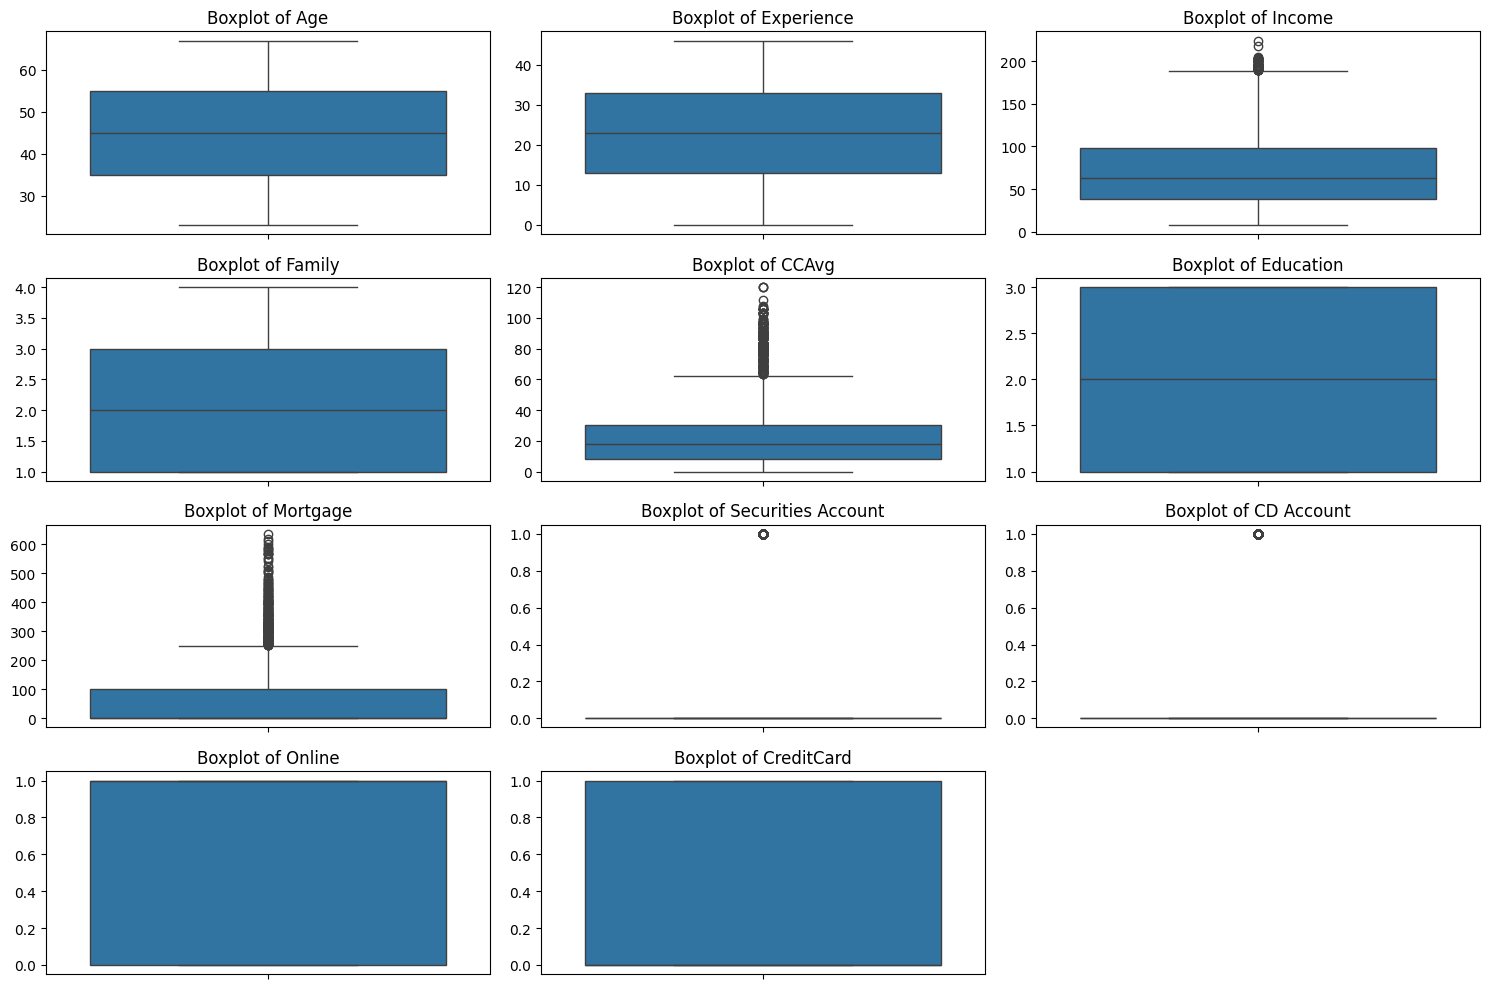

In [41]:
num_predictors = len(columns)
num_cols = 3
num_rows = (num_predictors + num_cols - 1) // num_cols
figsize = (15,10)
plt.figure(figsize=figsize)

for i, col in enumerate(columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col]) # Plotting each boxplot
    plt.title(f'Boxplot of {col}')
    plt.ylabel('') # Avoid repeating y labels.

plt.tight_layout()
plt.show()

Identify the feature containing the largest number of outliers. Enter the name of the feature.

In [86]:
df_no_security = df_no_target.drop(columns=["Securities Account", "CD Account"])
columns = df_no_security.columns.to_list()
outlier_counts = {}
outlier_threshold = 3
for column in columns:
        # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

     # Count the number of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# Get feature with the most outliers
if outlier_counts:
    feature_with_most_outliers = max(outlier_counts, key=outlier_counts.get)
else:
    feature_with_most_outliers = None
feature_with_most_outliers

'Mortgage'

In [85]:

columns = df_no_target.columns.to_list()
outlier_counts = {}
outlier_threshold = 1.5
for column in columns:
        # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

     # Count the number of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

# Get feature with the most outliers
if outlier_counts:
    feature_with_most_outliers = max(outlier_counts, key=outlier_counts.get)
else:
    feature_with_most_outliers = None
feature_with_most_outliers

'Securities Account'

It makes sense to work with this feature. For this purpose, the following statistical considerations can be used. If you subtract the sample mean from the data, and then divided by the standard deviation, then, using the $68-95-99.7$ rule under the assumption of normality of distribution, we can discard the tails that are too far from zero.
Construct a histogram of the distribution of values within this feature.

<Axes: xlabel='Mortgage', ylabel='Count'>

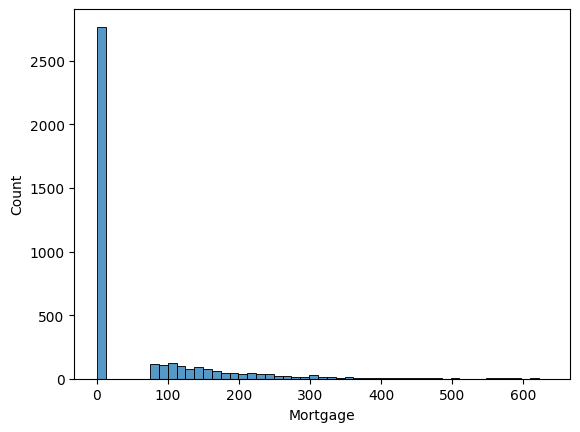

In [87]:
sns.histplot(df['Mortgage'])

<Axes: xlabel='Securities Account', ylabel='Count'>

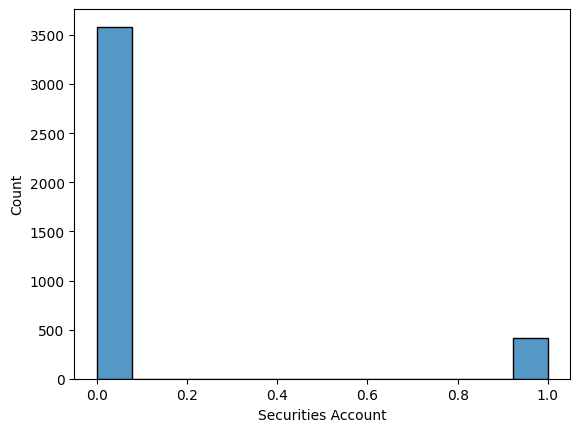

In [76]:
sns.histplot(df["Securities Account"])

Obviously, among the values of this feature there are a small number of values that lie "far away from the trend". We can use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> function from the <code>scipy</code> library.

Recalling the course of probability theory, it becomes clear that about $99.7\%$ of the normal distribution will be contained in the interval $[-3\sigma, 3\sigma]$. Determine the number of elements whose modulus of <code>z-score</code> is greater than $3$. 

In [88]:
from scipy.stats import zscore
z_scores = zscore(df["Mortgage"])
extreme_values_counts = np.sum(np.abs(z_scores) > 3)
extreme_values_counts

np.int64(83)

In [77]:
z_scores = zscore(df["Securities Account"])
extreme_values_counts = np.sum(np.abs(z_scores) > 3)
extreme_values_counts

np.int64(0)

So, there are not very many outliers, so they can simply be discarded from the provided dataset. Enter the remaining number of rows in the dataset.

In [89]:
outlier_indices = np.where(np.abs(z_scores) > 3)[0]
rows_to_drop = set()
rows_to_drop.update(outlier_indices)
df_filtered = df.drop(index=list(rows_to_drop))
df_filtered

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,39,89,2,33.6,1,0,0,0,0,1,0
1,44,22,30,1,6.0,3,0,0,0,0,1,0
2,26,3,19,1,1.2,2,121,0,0,0,1,0
3,34,12,41,2,1.2,1,161,0,0,0,1,1
4,56,35,51,4,18.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,37,14,59,4,2.4,3,0,0,0,0,0,0
3996,36,13,91,1,18.0,3,289,0,0,0,1,0
3997,57,34,131,2,32.4,1,0,0,0,0,0,0
3998,40,18,83,1,12.0,3,0,0,0,0,0,0


# Model building

# Basic algorithm

Use <code>train_test_split</code> to split the dataset into training and test samples with the parameters from your individual assignment.

In [90]:
X = df_filtered.drop(columns=['Personal Loan'])
y = df_filtered['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

Train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [91]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=33, criterion='gini')
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=33)

In [92]:
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.8611111111111112)

In [93]:
model = DecisionTreeClassifier(random_state=33, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.8591549295774648)

## Consideration of class ratio imbalance

And now, if we remember that the dataset is unbalanced, we can specify an additional parameter <code>class_weight</code>. Train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [94]:
model = DecisionTreeClassifier(random_state=33, criterion='gini', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.896551724137931)

In [95]:
model = DecisionTreeClassifier(random_state=33, criterion='entropy', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.9054054054054054)

## Upsampling of training dataset

In addition to the obvious assignment of weights to unbalanced classes, we can use the algorithm <code>SMOTE</code>. It receives instances of all classes with their labels as input, and in turn tries to extrapolate the data distribution of that class itself based on them. It then samples new class objects until the number of objects of each class is the same.

It turns out that in this case a balanced sample will be obtained, and there will be no need to fiddle with weights and so on. 

Determine the proportion of elements of class $0$ of the training dataset.

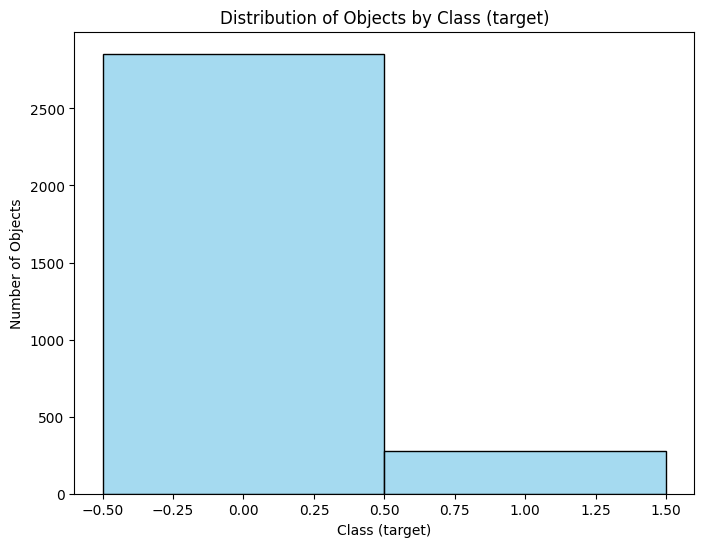

In [96]:
def plot_class_distribution(y_train, target_name = 'target', figsize = (8,6)):
    """
    Plots a histogram showing the distribution of objects by class in the training dataset.

    Args:
        y_train (pd.Series or np.array): The target labels (classes).
        target_name (str, optional): The name of the target column. Defaults to 'target'.
        figsize (tuple): The size of the figure.

    """

    plt.figure(figsize = figsize)
    sns.histplot(y_train, discrete=True, color = 'skyblue')
    plt.title(f"Distribution of Objects by Class ({target_name})")
    plt.xlabel(f"Class ({target_name})")
    plt.ylabel("Number of Objects")
    plt.show()
plot_class_distribution(y_train, target_name = 'target', figsize = (8,6))

In [102]:
def calculate_class_proportion(y_train, target_name = 'target', target_class=0):
    """
    Calculates the proportion (percentage) of elements belonging to a specific
     target class in the training dataset.

    Args:
        y_train (pd.Series or np.array): The target labels (classes).
        target_name (str, optional): The name of the target column. Defaults to 'target'.
        target_class (int or str, optional): The specific target class to calculate the proportion for.
                                       Defaults to 0.

    Returns:
        float: The proportion (percentage) of elements of the specified class.
    """

    total_elements = len(y_train)
    if total_elements == 0:
       raise ValueError("The target labels are empty")

    class_elements = np.sum(y_train == target_class)
    proportion = (class_elements / total_elements)

    return proportion
calculate_class_proportion(y_train, target_name = 'target', target_class=0)

np.float64(0.9112671560804341)

Using the <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> class from the <code>imblearn.over_sampling</code> module, balance the training dataset with the parameters from your individual assignment.

In [98]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=33)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Make sure that the dataset now contains the same number of representatives of both classes.

Enter the number of objects of class $1$ of the training dataset after the upsampling.

In [99]:
amount_class_one = np.sum(y_train_balanced == 1)
amount_class_one

np.int64(2855)

Re-train the <code>DecisionTreeClassifier</code> model on the training dataset with the parameters from your individual assignment. Compute <code>f1_score</code> of the model on test dataset.

In [100]:
model = DecisionTreeClassifier(random_state=33, criterion='gini')
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.825)

In [101]:
model = DecisionTreeClassifier(random_state=33, criterion='entropy')
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

np.float64(0.8301886792452831)